# 1. Problem Statement

The data set cover online and offline transaction records and customers information. With the massive information, the stakeholders want to have a customer portrait and find out the value of each customer segment.  A clear understanding of their portrait and value may boost business operations and make their business more profitable.

# 2. Business Objectives
Based on the available dataset, we found that we can use RFM analytics for development of both e-commerce filed sales to find out the habits of each customer segment. The customer segmentation that will be generated by this project will later be able to help the olist to implement advertising / marketing strategies for each segment. The main goal of this project is to help meet the expectations of the company and create the grouping of each user segment through the following objectives:

*   Categorize customers based on their behavior, creating distinct segments through RFM Analytics.
*   Identify key defining characteristics within each customer segment.

By accomplishing these objectives, the Olist business team can effectively formulate marketing and advertising strategies tailored to the specific types or characteristics of each cluster we have established.


# 3. Customer Segment Analysis and Modelling

In [52]:
import math
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import os
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/1. customer segmentation/Data-Analytics-Customer-Segmentation-master')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 customer_address_cleaned.csv			   'DQA and Data Cleaning Transactions.ipynb'
 CustomerAddress_Cleaned.csv			    new_customer_list_cleaned.csv
 customer_demographic_cleaned.csv		    NewCustomerList_Cleaned.csv
 CustomerDemographic_Cleaned.csv		   'Projects1_Customer Segmentation'
 Customer_Trans_RFM_Analysis.csv		    Raw_data.xlsx
'data visualization'				    README.md
'DQA and Data Cleaning Customer Address.ipynb'	   'RFM Analysis.ipynb'
'DQA and Data Cleaning CustomerDemographic.ipynb'   transaction.csv
'DQA and Data Cleaning NewCustomerList.ipynb'	    Transactions_Cleaned.csv


#3. Customer Segmentation Analysis
## 3.1 RFM model
RFM analysis is a domain-knowneledgea-based method where we sort customers into different groups depending on their buying behavior – you know, what they've been up to in terms of shopping. It's all about digging into their past purchase history. How long ago did they buy something, how often do they shop, and how much dough are they dropping? We're basically putting customers into neat little categories so we can give them better service.

So, picture this – you've got these big spenders, right? But what if they only splurged once, or how recently did they go on a shopping spree? Are they repeat customers? RFM helps us figure all that out. And it's not just for kicks – it's thought to be a handy tool for managers to whip up some personalized promotions.

Basically, the RFM model covers the following aspects:

- Recency (R): Who's the recent shopper in the house? We're talking
about the number of days since their last purchase – the less recent, the better.

- Frequency (F): Who's practically a regular here? This one's about the total number of times they've made a purchase – the higher, the merrier.

- Monetary Value (M): Who's throwing around the big bucks? It's all about the total moolah they've dropped – the bigger the number, the more they're worth to us.

When breaking customer groups into different segments, domain knowledge comes to play. The analyst should decide appropriate interval for breaking, like what range of monetary should be considered 'high', 'low','medium'. He also need to identify business value behind the segment results and dig out who our targeted customers should be, who can bring most value for our business, with who we should maintain good relationship, all that.

In [53]:
trans = pd.read_csv('transaction.csv')
cust = pd.read_csv('customer_demographic_cleaned.csv')
trans.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [54]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19803 entries, 0 to 19802
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19803 non-null  int64  
 1   product_id               19803 non-null  int64  
 2   customer_id              19803 non-null  int64  
 3   transaction_date         19803 non-null  object 
 4   online_order             19803 non-null  object 
 5   order_status             19803 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               19803 non-null  float64
 11  standard_cost            19803 non-null  float64
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 2.0+ MB


In [55]:
cust.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,combined_column
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli Bockman
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,Arlin Dearle
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,Null,IT,Mass Customer,N,No,7.0,Talbot nan
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Null,Affluent Customer,N,Yes,8.0,Sheila-kathryn Calton


In [56]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3913 non-null   int64  
 1   first_name                           3913 non-null   object 
 2   last_name                            3792 non-null   object 
 3   gender                               3913 non-null   object 
 4   past_3_years_bike_related_purchases  3913 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3913 non-null   object 
 7   job_industry_category                3913 non-null   object 
 8   wealth_segment                       3913 non-null   object 
 9   deceased_indicator                   3913 non-null   object 
 10  owns_car                             3913 non-null   object 
 11  tenure                        

In [57]:
merged_trans_cust = pd.merge(trans, cust, left_on='customer_id', right_on='customer_id', how='inner')

In [58]:
merged_trans_cust.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,combined_column
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,Kristos Anthony
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,Kristos Anthony
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,Kristos Anthony
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,Lauree O'Donnell
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,Lauree O'Donnell


In [59]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19362 entries, 0 to 19361
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19362 non-null  int64  
 1   product_id                           19362 non-null  int64  
 2   customer_id                          19362 non-null  int64  
 3   transaction_date                     19362 non-null  object 
 4   online_order                         19362 non-null  object 
 5   order_status                         19362 non-null  object 
 6   brand                                19362 non-null  object 
 7   product_line                         19362 non-null  object 
 8   product_class                        19362 non-null  object 
 9   product_size                         19362 non-null  object 
 10  list_price                           19362 non-null  float64
 11  standard_cost               

In [60]:
merged_trans_cust['transaction_date']= pd.to_datetime(merged_trans_cust['transaction_date'])
merged_trans_cust['DOB']= pd.to_datetime(merged_trans_cust['DOB'])

In [61]:
#recency feature creating
from datetime import datetime
date_base = max(merged_trans_cust['transaction_date']).date()
date_base = datetime.strptime(str(date_base), "%Y-%m-%d")

In [62]:
#Monetary Feature creating
merged_trans_cust['Profit'] = merged_trans_cust['list_price']-merged_trans_cust['standard_cost']

In [63]:
merged_trans_cust['product_id']

0         2
1         1
2        62
3         3
4         4
         ..
19357    45
19358    83
19359     3
19360     3
19361    30
Name: product_id, Length: 19362, dtype: int64

In [64]:
# Creating a RFM table that will contain all the values for recency , frequency and Monetray data.
rfm_table = merged_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date : (date_base - date.max()).days,
                                                           'product_id' : lambda prod_id : len(prod_id),#total number of product he bought. You can verify by extracting records of a customer and count the length of records
                                                            'Profit' : lambda p : sum(p)})
rfm_table.rename(columns={'transaction_date' : 'recency',
                        'product_id' : 'frequency',
                        'Profit' : 'monetary'} , inplace=True)

<Axes: xlabel='monetary', ylabel='Count'>

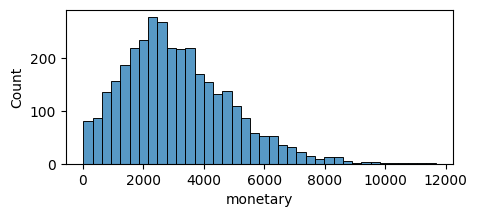

In [65]:
plt.figure(figsize=(5,2))
sns.histplot(rfm_table['monetary'])

<Axes: xlabel='recency', ylabel='Count'>

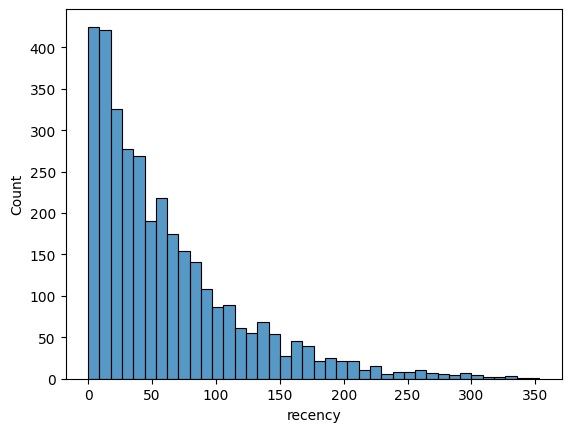

In [66]:
sns.histplot(rfm_table['recency'])

<Axes: xlabel='frequency', ylabel='Count'>

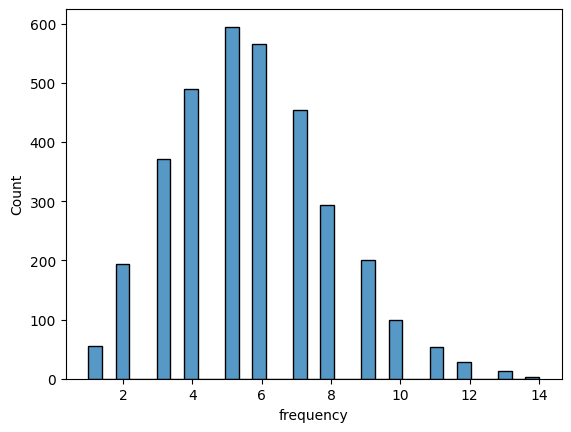

In [67]:
sns.histplot(rfm_table['frequency'])

In [68]:
#Let examine whether the percentiles way is good for splitting.
percentiles = [25, 50, 75]
percentile_values = np.percentile(rfm_table['frequency'], percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f'{p}th percentile(for frequency): {value}')
percentile_values = np.percentile(rfm_table['monetary'], percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f'{p}th percentile(for monetary): {value}')
percentile_values = np.percentile(rfm_table['recency'], percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f'{p}th percentile(for recency): {value}')

25th percentile(for frequency): 4.0
50th percentile(for frequency): 6.0
75th percentile(for frequency): 7.0
25th percentile(for monetary): 1835.1799999999998
50th percentile(for monetary): 2848.94
75th percentile(for monetary): 4173.67
25th percentile(for recency): 18.0
50th percentile(for recency): 44.0
75th percentile(for recency): 86.0


What if I split the variables according to the their range?Like, a recency value less than a certain threshold should be considered relatively close, whereas a value greater than this threshold should be regarded as relatively distant. Deciding the threshold is more based on domain knowledge.

In [69]:
print('recency: 25%: ', rfm_table['recency'].max()*0.25, '\t50%: ',rfm_table['recency'].max()*0.5,'\t75%: ',rfm_table['recency'].max()*0.75)
bins_recency=[0, rfm_table['recency'].max()*0.25, rfm_table['recency'].max()*0.5,rfm_table['recency'].max()*0.75,rfm_table['recency'].max()]

print('frequency: 25%: ', rfm_table['frequency'].max()*0.25, '\t50%: ',rfm_table['frequency'].max()*0.5, '\t75%: ',rfm_table['frequency'].max()*0.75)
bins_frequency=[0, rfm_table['frequency'].max()*0.25, rfm_table['frequency'].max()*0.5,rfm_table['frequency'].max()*0.75,rfm_table['frequency'].max()]

print('monetary: 25%: ', rfm_table['monetary'].max()*0.25, '\t50%: ',rfm_table['monetary'].max()*0.5, '\t75%: ',rfm_table['monetary'].max()*0.75)
bins_monetary=[0, rfm_table['monetary'].max()*0.25, rfm_table['monetary'].max()*0.5,rfm_table['monetary'].max()*0.75,rfm_table['monetary'].max()]
bins_monetary_adjusted=[0, 1000,5000,10000,rfm_table['monetary'].max()]

rfm_table['recency_percentile'] = pd.cut(rfm_table['recency'], bins=bins_recency, labels=['4', '3', '2','1'], include_lowest=True, right=True)
rfm_table['frequency_percentile'] = pd.cut(rfm_table['frequency'], bins=bins_frequency, labels=['1', '2', '3','4'], include_lowest=True, right=True)
rfm_table['monetary_percentile'] = pd.cut(rfm_table['monetary'], bins=bins_monetary, labels=['1', '2', '3','4',], include_lowest=True, right=True)
rfm_table['monetary_percentile_adj'] = pd.cut(rfm_table['monetary'], bins=bins_monetary_adjusted, labels=['1', '2', '3','4',], include_lowest=True, right=True)

recency_percentage = rfm_table['recency_percentile'].value_counts(normalize=True) * 100
frequency_percentage = rfm_table['frequency_percentile'].value_counts(normalize=True) * 100
monetary_percentage = rfm_table['monetary_percentile'].value_counts(normalize=True) * 100
monetary_percentage_adj = rfm_table['monetary_percentile_adj'].value_counts(normalize=True) * 100
print("Recency Percentile:")
print(recency_percentage)

print("\nFrequency Percentile:")
print(frequency_percentage)

print("\nMonetary Percentile:")
print(monetary_percentage)

print("\nMonetary Percentile_adj:")
print(monetary_percentage_adj)

recency: 25%:  88.25 	50%:  176.5 	75%:  264.75
frequency: 25%:  3.5 	50%:  7.0 	75%:  10.5
monetary: 25%:  2917.2374999999997 	50%:  5834.474999999999 	75%:  8751.7125
Recency Percentile:
4    76.002341
3    18.583553
2     4.331285
1     1.082821
Name: recency_percentile, dtype: float64

Frequency Percentile:
2    61.603746
1    18.144571
3    17.354404
4     2.897278
Name: frequency_percentile, dtype: float64

Monetary Percentile:
1    51.214516
2    41.088674
3     7.111501
4     0.585309
Name: monetary_percentile, dtype: float64

Monetary Percentile_adj:
2    75.563360
3    14.164472
1    10.038045
4     0.234124
Name: monetary_percentile_adj, dtype: float64



For recency, the data is highly imbalanced as most of them concentrate in the left side and over 76% data was smaller than 88.25, 25% of the value range. So we just split them in business way, like 7days, A month, three month, half year, a year and more than one year.

Values distribution in frequency is similar to that in recency. It 's difficult to seperate them so we suggest taking business logic again. We can use 5, 10 to split them into low, medium, high frequency.

As for monetary, we tried two ways. One is using percentiles in number range,another is domain based, simply spliting them to 0 to 1000(since there are many customers spend less than these value and they can be new user, user who dislike our products, anyway, I think this threshold would be useful to our customers' analysis), 1000 to 5000, 5000 to 10000, and more than 10000. The former lacks explainability though has a better distribution. Anyway we decided to go for the second way.


In [70]:
bins_recency_adj=[0, 30, 180, 365]
#We choose to only have 3 segments here, rather than 5, to imporve explainability and reduce complexity.
bins_frequency_adj=[0, 5, 10, rfm_table['frequency'].max()]
rfm_table['recency_percentile_adj'] = pd.cut(rfm_table['recency'], bins=bins_recency_adj, labels=['3','2','1'], include_lowest=True, right=True)
rfm_table['frequency_percentile_adj'] = pd.cut(rfm_table['frequency'], bins=bins_frequency_adj, labels=['1', '2', '3'], include_lowest=True, right=True)
recency_percentage_adj = rfm_table['recency_percentile_adj'].value_counts(normalize=True) * 100
frequency_percentage_adj = rfm_table['frequency_percentile_adj'].value_counts(normalize=True) * 100
print("Recency Percentile:")
print(recency_percentage_adj)

print("\nFrequency Percentile:")
print(frequency_percentage_adj)

Recency Percentile:
2    56.774949
3    38.074334
1     5.150717
Name: recency_percentile_adj, dtype: float64

Frequency Percentile:
1    49.897571
2    47.205151
3     2.897278
Name: frequency_percentile_adj, dtype: float64


In [71]:
#to build a 4 * 3 * 3 segments containing all the customers
rfm_table['rfm_class']= 100*rfm_table['frequency_percentile_adj'].astype(int)+10*rfm_table['monetary_percentile_adj'].astype(int)+rfm_table['recency_percentile_adj'].astype(int)
rfm_table

,recency,frequency,monetary,recency_percentile,frequency_percentile,monetary_percentile,monetary_percentile_adj,recency_percentile_adj,frequency_percentile_adj,rfm_class
customer_id,,,,,,,,,,
1,7,11,3018.09,4,4,2,2,3,3,323
2,128,3,2226.26,3,1,1,2,2,1,122
3,102,8,3362.81,3,3,2,2,2,2,222
4,195,2,220.57,2,1,1,1,1,1,111
5,16,6,2394.94,4,2,1,2,3,2,223
...,...,...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,2,2,1,2,1,1,121
3497,52,3,1648.32,4,1,1,2,2,1,122
3498,127,6,3147.33,3,2,2,2,2,2,222


Customers Tagging, Number of customer for each group

In [72]:
# Function as a lookup to appropiate customer titles based on RFM class.

def customer_tag(cols):

    monetary = int(cols['monetary_percentile_adj'])
    recency = int(cols['recency_percentile_adj'])
    frequency = int(cols['frequency_percentile_adj'])

    if monetary >= 3 and recency ==3 and frequency==3:
        return 'Platinum Customer'
    elif ((frequency >=2 and recency >2) or( frequency >2 and recency>=2)) and monetary >2:
        return 'Very Loyal'
    elif frequency>=2 and recency >2:
        return 'Loyal Customer'
    elif recency >2:
        return 'Recent Customer'
    elif recency ==2 and frequency >=2:
        return 'Potential Customer'
    elif recency ==2 and frequency ==1:
        return 'High Risk Customer'
    elif frequency >=2 and recency ==1:
        return 'Loosing Customer'
    elif frequency ==1 and recency==1:
        return 'Lost Customer'

In [73]:
rfm_table['detail_cust_title']=rfm_table.apply(customer_tag, axis=1)
# len(merged_trans_cust['customer_id'].unique()) #check the entire number of customers
# rfm_table.info()
rfm_table['detail_cust_title'].value_counts()

High Risk Customer    1041
Potential Customer     874
Loyal Customer         552
Recent Customer        501
Very Loyal             229
Lost Customer          163
Platinum Customer       44
Loosing Customer        13
Name: detail_cust_title, dtype: int64

In [74]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 1 to 3500
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   recency                   3417 non-null   int64   
 1   frequency                 3417 non-null   int64   
 2   monetary                  3417 non-null   float64 
 3   recency_percentile        3417 non-null   category
 4   frequency_percentile      3417 non-null   category
 5   monetary_percentile       3417 non-null   category
 6   monetary_percentile_adj   3417 non-null   category
 7   recency_percentile_adj    3417 non-null   category
 8   frequency_percentile_adj  3417 non-null   category
 9   rfm_class                 3417 non-null   int64   
 10  detail_cust_title         3417 non-null   object  
dtypes: category(6), float64(1), int64(3), object(1)
memory usage: 181.2+ KB


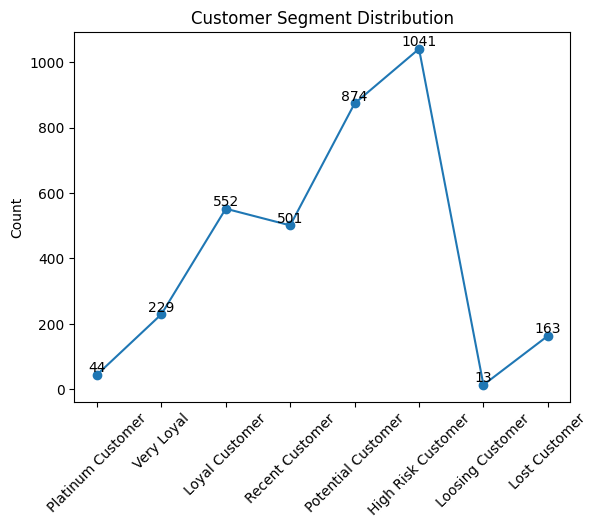

In [75]:
order=['Platinum Customer','Very Loyal','Loyal Customer','Recent Customer','Potential Customer','High Risk Customer','Loosing Customer','Lost Customer']
rfm_table['detail_cust_title'] = pd.Categorical(rfm_table['detail_cust_title'], categories=order, ordered=True)
value_counts = rfm_table['detail_cust_title'].value_counts(sort=False)
plt.plot(value_counts.index, value_counts.values, marker='o')
plt.title('Customer Segment Distribution')
# plt.xlabel('Category')
plt.ylabel('Count')
for i, count in enumerate(value_counts.values):
    plt.text(value_counts.index[i], count, str(count), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

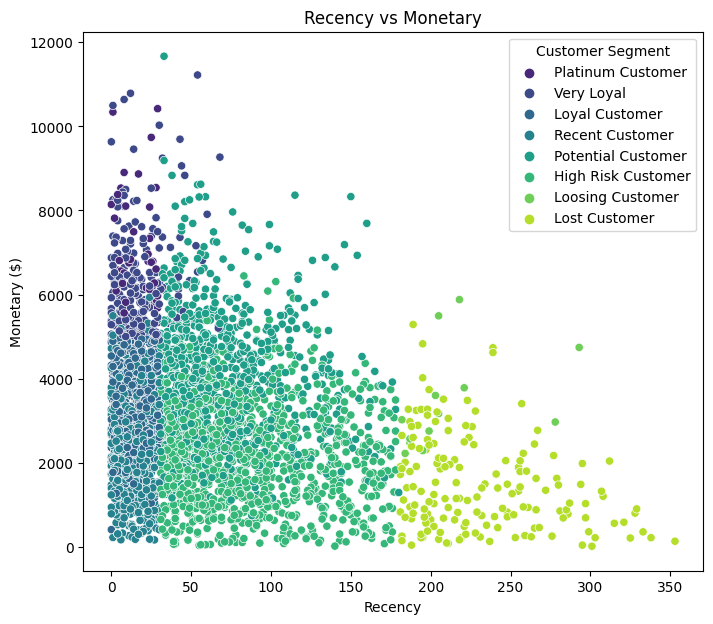

In [76]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=rfm_table, x='recency', y='monetary', hue='detail_cust_title', palette='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.legend(title='Customer Segment')
plt.show()

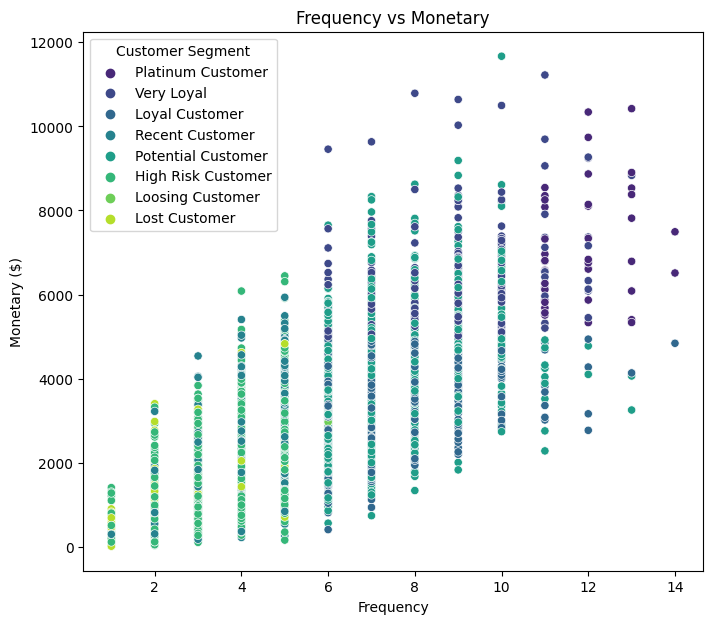

In [78]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=rfm_table, x='frequency', y='monetary', hue='detail_cust_title', palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.legend(title='Customer Segment')
plt.show()

Exporting to CSV File

In [79]:
# rfm_table.info()
columns_to_drop = ['recency_percentile', 'frequency_percentile', 'monetary_percentile']
rfm_table_output = rfm_table.drop(columns=columns_to_drop)
rfm_table_output.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)
rfm_table_output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 1 to 3500
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   recency                   3417 non-null   int64   
 1   frequency                 3417 non-null   int64   
 2   monetary                  3417 non-null   float64 
 3   monetary_percentile_adj   3417 non-null   category
 4   recency_percentile_adj    3417 non-null   category
 5   frequency_percentile_adj  3417 non-null   category
 6   rfm_class                 3417 non-null   int64   
 7   detail_cust_title         3417 non-null   category
dtypes: category(4), float64(1), int64(3)
memory usage: 147.6 KB


#4. Results Analysis
We delved deeper into the RFM analysis results to have favourite brands and products for loyal, high value customers, and their geographical distribution, and age distribution.

In [80]:
merged_cust_rfm = pd.merge(cust, rfm_table_output, left_on='customer_id', right_on='customer_id', how='inner')
merged_cust_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 0 to 3416
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          3417 non-null   int64   
 1   first_name                           3417 non-null   object  
 2   last_name                            3308 non-null   object  
 3   gender                               3417 non-null   object  
 4   past_3_years_bike_related_purchases  3417 non-null   int64   
 5   DOB                                  3417 non-null   object  
 6   job_title                            3417 non-null   object  
 7   job_industry_category                3417 non-null   object  
 8   wealth_segment                       3417 non-null   object  
 9   deceased_indicator                   3417 non-null   object  
 10  owns_car                             3417 non-null   object  
 11  tenure           

In [81]:
merged_cust_rfm

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,combined_column,recency,frequency,monetary,monetary_percentile_adj,recency_percentile_adj,frequency_percentile_adj,rfm_class,detail_cust_title
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,...,11.0,Laraine Medendorp,7,11,3018.09,2,3,3,323,Loyal Customer
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,...,16.0,Eli Bockman,128,3,2226.26,2,2,1,122,High Risk Customer
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,...,15.0,Arlin Dearle,102,8,3362.81,2,2,2,222,Potential Customer
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,Null,IT,Mass Customer,N,...,7.0,Talbot nan,195,2,220.57,1,1,1,111,Lost Customer
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Null,Affluent Customer,N,...,8.0,Sheila-kathryn Calton,16,6,2394.94,2,3,2,223,Loyal Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,3496,Danya,Burnyeat,Male,99,1986-04-25 00:00:00,Editor,Manufacturing,Mass Customer,N,...,19.0,Danya Burnyeat,256,4,2045.84,2,1,1,121,Lost Customer
3413,3497,Thia,O'Day,Female,73,1986-05-03 00:00:00,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,18.0,Thia O'Day,52,3,1648.32,2,2,1,122,High Risk Customer
3414,3498,Lois,Abrahim,Female,28,1995-11-02 00:00:00,Null,Manufacturing,Mass Customer,N,...,5.0,Lois Abrahim,127,6,3147.33,2,2,2,222,Potential Customer
3415,3499,Shelton,Tewkesberrie,Male,29,1979-06-17 00:00:00,Null,Manufacturing,Mass Customer,N,...,7.0,Shelton Tewkesberrie,51,7,4955.25,2,2,2,222,Potential Customer


In [82]:
date_base

datetime.datetime(2017, 12, 30, 0, 0)

In [83]:
def age_cal(cols):
  DOB=pd.to_datetime(cols)
  return (date_base - DOB).days // 365
merged_cust_rfm['age'] =merged_cust_rfm['DOB'].apply(age_cal)
merged_cust_rfm

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,combined_column,recency,frequency,monetary,monetary_percentile_adj,recency_percentile_adj,frequency_percentile_adj,rfm_class,detail_cust_title,age
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,...,Laraine Medendorp,7,11,3018.09,2,3,3,323,Loyal Customer,64
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,...,Eli Bockman,128,3,2226.26,2,2,1,122,High Risk Customer,37
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,...,Arlin Dearle,102,8,3362.81,2,2,2,222,Potential Customer,63
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,Null,IT,Mass Customer,N,...,Talbot nan,195,2,220.57,1,1,1,111,Lost Customer,56
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Null,Affluent Customer,N,...,Sheila-kathryn Calton,16,6,2394.94,2,3,2,223,Loyal Customer,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,3496,Danya,Burnyeat,Male,99,1986-04-25 00:00:00,Editor,Manufacturing,Mass Customer,N,...,Danya Burnyeat,256,4,2045.84,2,1,1,121,Lost Customer,31
3413,3497,Thia,O'Day,Female,73,1986-05-03 00:00:00,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,Thia O'Day,52,3,1648.32,2,2,1,122,High Risk Customer,31
3414,3498,Lois,Abrahim,Female,28,1995-11-02 00:00:00,Null,Manufacturing,Mass Customer,N,...,Lois Abrahim,127,6,3147.33,2,2,2,222,Potential Customer,22
3415,3499,Shelton,Tewkesberrie,Male,29,1979-06-17 00:00:00,Null,Manufacturing,Mass Customer,N,...,Shelton Tewkesberrie,51,7,4955.25,2,2,2,222,Potential Customer,38


<Axes: xlabel='age', ylabel='Count'>

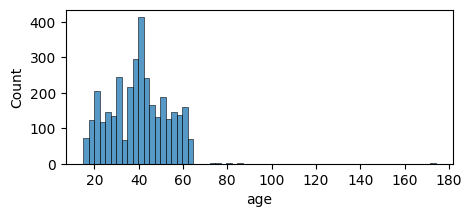

In [84]:
plt.figure(figsize=(5,2))
sns.histplot(merged_cust_rfm['age'])

In [85]:
merged_cust_rfm=merged_cust_rfm[merged_cust_rfm['age']<90] #Eliminating the outliers

Platinum Customer

<Axes: xlabel='age', ylabel='Count'>

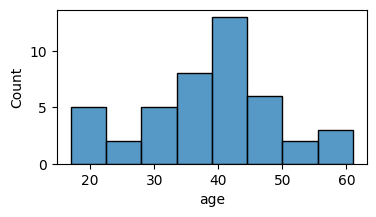

In [89]:
plt.figure(figsize=(4,2))
sns.histplot(merged_cust_rfm.query('detail_cust_title=="Platinum Customer"')['age'])

<Axes: xlabel='wealth_segment', ylabel='Count'>

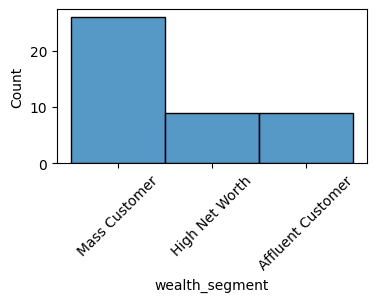

In [93]:
plt.figure(figsize=(4,2))
plt.xticks(rotation=45)
sns.histplot(merged_cust_rfm.query('detail_cust_title=="Platinum Customer"')['wealth_segment'])

<Axes: xlabel='job_industry_category', ylabel='Count'>

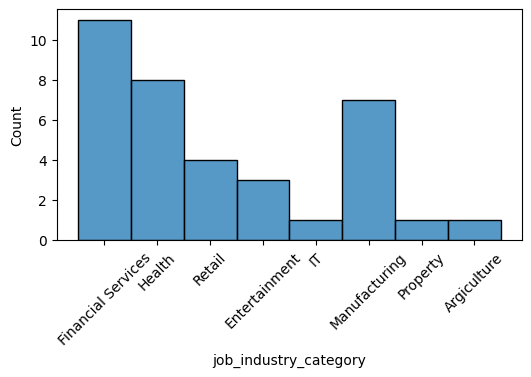

In [100]:
plt.figure(figsize=(6,3))
plt.xticks(rotation=45)
sns.histplot(merged_cust_rfm.query('detail_cust_title=="Platinum Customer" & job_industry_category != "Null"')['job_industry_category'])